<a href="https://colab.research.google.com/github/lewagonJohnMendez/dotfiles/blob/master/26_Translate_products_catalogue_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 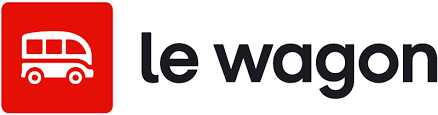

1) Download and import [`daco_fc_products_catalogue.json`](https://drive.google.com/file/d/1jB8PBdwkROq9sFMDnpDZcEPdIzWcJYFZ/view) to colab.

Execute code below to load data to `daco_products` variable

In [ ]:
import json

with open('daco_fc_products_catalogue.json') as json_file:
    daco_products = json.load(json_file)

2) How is data structured in this file ?

In [ ]:
print(daco_products["Entrenamiento"].keys())

dict_keys(['Pelotas de Entrenamiento', 'Conos y Marcadores', 'Equipos de Resistencia', 'Escaleras de Coordinación', 'Vallas y Aros', 'Barreras y Mini Porterías', 'Maniquíes y Dummies', 'Picas y Postes de Entrenamiento', 'Cuerdas de Salto', 'Discos de Cono', 'Equipamiento de Agilidad', 'Equipamiento de Fuerza', 'Equipamiento de Flexibilidad', 'Equipamiento de Rehabilitación', 'Accesorios de Entrenamiento'])


In [ ]:
print(daco_products.keys())
print(daco_products["Entrenamiento"].keys())
print(daco_products["Entrenamiento"]["Pelotas de Entrenamiento"])


dict_keys(['Merchandising', 'Entrenamiento', 'Equipamiento de arqueros', 'Ropa de futbol', 'Calzados', 'Protección', 'Equipamiento Arbitraje', 'Nutrición deportiva', 'Libros y revistas'])
dict_keys(['Pelotas de Entrenamiento', 'Conos y Marcadores', 'Equipos de Resistencia', 'Escaleras de Coordinación', 'Vallas y Aros', 'Barreras y Mini Porterías', 'Maniquíes y Dummies', 'Picas y Postes de Entrenamiento', 'Cuerdas de Salto', 'Discos de Cono', 'Equipamiento de Agilidad', 'Equipamiento de Fuerza', 'Equipamiento de Flexibilidad', 'Equipamiento de Rehabilitación', 'Accesorios de Entrenamiento'])
['Balón de fútbol profesional', 'Balón de fútbol para entrenamiento', 'Balón de fútbol sala', 'Balón de fútbol de playa', 'Balón de fútbol de entrenamiento para niños', 'Balón de entrenamiento de precisión', 'Balón de entrenamiento con peso', 'Balón de entrenamiento de rebote controlado']


Main categories are keys, sub categories as sub keys and products are stored in lists.

3) Execute following command to download `googletrans` which is a translating Python library developped by Google.

In [ ]:
!pip3 install googletrans==3.1.0a0

4) Execute the following code to use Translator from googletrans.

What is the type of translator variable? What part of the course does this make you think of?

In [ ]:
from googletrans import Translator

translator = Translator()

translator is an object with attributes and methods !

5) Read the [following documentation](https://pypi.org/project/googletrans/) and find out how to translate "¡Estoy descubriendo Python y ya me encanta!" in english with code.

In [ ]:
s="¡Estoy descubriendo Python y ya me encanta!"
translation = translator.translate(s, dest="en")
print(translation.text)

I'm discovering Python and I already love it!


function `translate` is a method of the class Tranlator and `.text` is an attribute of the object returned by this method.

6) Create a Python function that takes a string as input and translator variable and returns the translation in portuguese ('pt')

Test your function

In [ ]:
def translate(translator, s):
  return translator.translate(s, dest="pt").text


translate(translator, "my function seems to work")

'minha função parece funcionar'

7) We will create a translated version of the json file you uploaded.

Create a new empty dictionnary and iterate over all keys, sub keys and products and translate them. Keep same data structure.

In [ ]:
daco_products_translated = {}

# iterate over keys
for key in daco_products:

  # translate key using your function you created
  translated_key = translate(translator, key)
  # add translated key to daco_products_translated
  daco_products_translated[translated_key] = {}

  # iterate over sub keys
  for sub_key in daco_products[key]:

    # translate sub key
    translated_sub_key = translate(translator, sub_key)
    # add translated sub key to daco_products_translated
    daco_products_translated[translated_key][translated_sub_key] = []

    # iterate over sub products
    for product in daco_products[key][sub_key]:

      # translate product
      product_translated = translate(translator, product)
      # add translated product to daco_products_translated
      daco_products_translated[translated_key][translated_sub_key].append(product_translated)


8) Check the results

In [ ]:
print(daco_products_translated.keys())
print(daco_products_translated["Treinamento"].keys())
print(daco_products_translated["Treinamento"]["Bolas de treinamento"])

dict_keys(['Merchandising', 'Treinamento', 'Equipamento de arqueiro', 'roupas de futebol', 'Calçados', 'Proteção', 'Equipamento de Arbitragem', 'Nutrição Esportiva', 'Livros e revistas'])
dict_keys(['Bolas de treinamento', 'Cones e Marcadores', 'Equipos de Resistencia', 'Escadas de Coordenação', 'Obstáculos e aros', 'Barreiras e Mini Metas', 'Manequins e manequins', 'Piques e bastões de treinamento', 'Cordas de pular', 'Discos de Cono', 'Equipamento de agilidade', 'Equipamento de força', 'Equipamento de flexibilidade', 'Equipamento de reabilitação', 'Acessórios de treinamento'])
['bola de futebol profissional', 'Bola de futebol para treino', 'bola de futsal', 'bola de futebol de praia', 'Bola de futebol para treinamento infantil', 'Bola de treinamento de precisão', 'Bola de musculação', 'Bola de treinamento de salto controlado']


9) Congratulations you made it !

The translated products need to be reviewed by the product team. Unfortunatly, product team doesn't know how to read json files.

They want a csv file with three columns : category, sub_category and product.

Create this DataFrame.

*hint : start by creating a list of dictionnaries, each dictionnary with three keys (category, sub_category, product). Transform this list to a DataFrame and finally save it to csv format.*

In [ ]:
import pandas as pd

all_products = []

for key in daco_products_translated:
  for sub_key in daco_products_translated[key]:
    for product in daco_products_translated[key][sub_key]:
      d = {"category": key,
           "sub_category": sub_key,
           "product": product
           }
      all_products.append(d)

# transform it to DataFrame
df_translated_products = pd.DataFrame(all_products)
df_translated_products

,category,sub_category,product
0,Merchandising,Roupas,Camisas oficiais do jogo (em casa e fora)
1,Merchandising,Roupas,Moletons com capuz
2,Merchandising,Roupas,Jaquetas
3,Merchandising,Roupas,Camisetas retrô com designs antigos
4,Merchandising,Roupas,Camisetas de treino
...,...,...,...
520,Livros e revistas,História do Estádio e da Torcida,Daco FC: Os cantos e rituais dos torcedores.
521,Livros e revistas,História do Estádio e da Torcida,A paixão do Daco FC em casa e na estrada: Viaj...
522,Livros e revistas,História do Estádio e da Torcida,O estádio Daco FC na história do futebol local.
523,Livros e revistas,História do Estádio e da Torcida,Daco FC: A relação especial entre o estádio e ...
